In [1]:
# We illustrate effect of prior on parameters for logistic regression
# Based on fig 11.3 of
# [Statistical Rethinking ed 2](https://xcelab.net/rm/statistical-rethinking/).

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import numpy as np

np.set_printoptions(precision=3)
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats

try:
    import arviz as az
except ModuleNotFoundError:
    %pip install -qq arviz
    import arviz as az
from scipy.special import expit

In [2]:
pml.latexify(fig_width=2.5, fig_height=1.5)

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


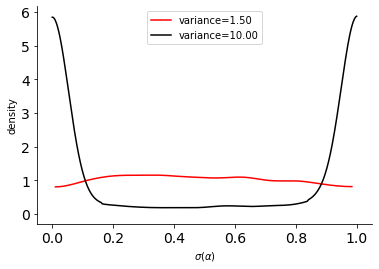

In [3]:
sigmas = [1.5, 10]
fig, ax = plt.subplots()
colors = ["r", "k"]
np.random.seed(0)
for i in range(2):
    sigma = sigmas[i]
    N = 1000
    a = stats.norm(0, sigma).rvs((N))
    logits = a
    probs = expit(logits)
    label = r"variance={:0.2f}".format(sigma)
    az.plot_kde(probs, ax=ax, plot_kwargs={"color": colors[i]}, label=label, legend=True)

sns.despine()
plt.xlabel(r"$\sigma(\alpha)$")
plt.ylabel("density")
pml.savefig("logreg_prior_offset", bbox_tight=True)
plt.show()